In [170]:
import gzip         # for reading .pkl.gz
import pickle       # to load the pickled dicts
import numpy as np  # for arrays, math
import matplotlib.pyplot as plt  # for plotting
from sklearn.metrics import r2_score
from matplotlib.colors import ListedColormap
from scipy.signal import find_peaks, peak_prominences, peak_widths


In [171]:
def mesh_index_to_km(x):
    return (x / 299) * 110

def km_to_mesh_index(x):
    return (x / 110) * 299

# FLUVIAL EROSION TESTS

Grounding Line plotting - Fluvial Erosion = 5.0 e-12

In [172]:
gl_run_title_cc_5e12 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 5.0 E^-12")
cc_5e12 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run1_5e-12/DATA_Dictionary_2025_04_03__22_51_29.pkl.gz"
with gzip.open(cc_5e12, 'rb') as f:
    DATA_dict_cc_5e12 = pickle.load(f)

In [173]:
bed_dict = DATA_dict_cc_5e12['bed_dict']
base_dict = DATA_dict_cc_5e12['base_dict']
surf_dict= DATA_dict_cc_5e12 ['surf_dict']
sed_dict = DATA_dict_cc_5e12['sed_dict']
H_dict = DATA_dict_cc_5e12['H_dict']
us_dict = DATA_dict_cc_5e12['us_dict']
ub_dict = DATA_dict_cc_5e12['ub_dict']
Hs_dict = DATA_dict_cc_5e12['Hs_dict']
GL_dict = DATA_dict_cc_5e12['GL_dict']
Qs_dict = DATA_dict_cc_5e12['Qs_dict']

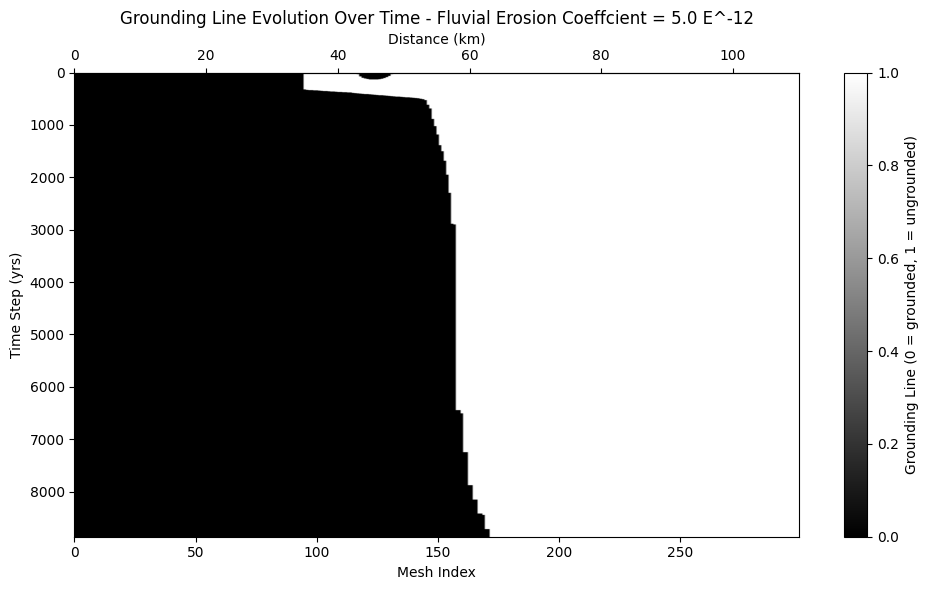

In [174]:
GL_dict = DATA_dict_cc_5e12['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_5e12)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [175]:
gl_positions_cc_5e12 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_5e12.append(idx)

gl_positions_cc_5e12 = np.array(gl_positions_cc_5e12)
GL_km_cc_5e12 = mesh_index_to_km(gl_positions_cc_5e12)

/home/kayatroyer/anaconda3/envs/thesis_analysis/lib/python3.11/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/kayatroyer/anaconda3/envs/thesis_analysis/lib/python3.11/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


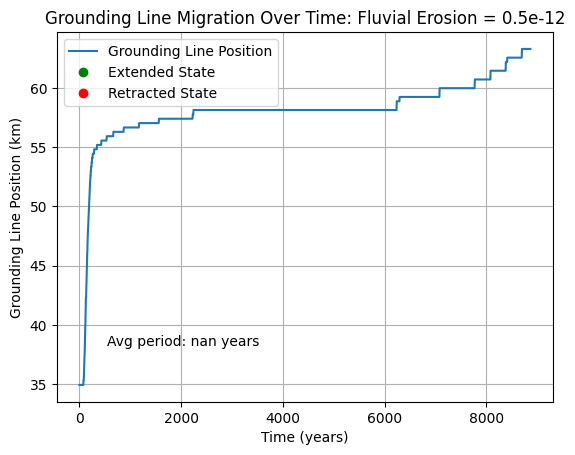

Mean cycle period: nan years
[]
Mean advance amplitude: nan km
[]
Mean retreat amplitude: nan km
[]


In [176]:
peaks_cc_5e12, _ = find_peaks(GL_km_cc_5e12, prominence=2) 
troughs_cc_5e12, _ = find_peaks(-GL_km_cc_5e12, prominence=2)     
periods_cc_5e12 = np.diff(np.array(time)[peaks_cc_5e12])
adv_dists_cc_5e12 = GL_km_cc_5e12[peaks_cc_5e12]
ret_dists__cc_5e12 = GL_km_cc_5e12[troughs_cc_5e12]


plt.plot(time, GL_km_cc_5e12, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_5e12], GL_km_cc_5e12[peaks_cc_5e12], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_5e12], GL_km_cc_5e12[troughs_cc_5e12], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_5e12):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 0.5e-12")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_5e12):.2f} years")
print(periods_cc_5e12)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_5e12):.2f} km")
print(adv_dists_cc_5e12)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_5e12):.2f} km")
print(ret_dists__cc_5e12)


Grounding Line plotting - Fluvial Erosion = 1.0 e-11


In [177]:
gl_run_title_cc_1e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 1.0 E^-11")
cc_1e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run2_1e-11/DATA_Dictionary_2025_04_03__23_16_33.pkl.gz"
with gzip.open(cc_1e11, 'rb') as f:
    DATA_dict_cc_1e11 = pickle.load(f)

In [178]:
bed_dict = DATA_dict_cc_1e11['bed_dict']
base_dict = DATA_dict_cc_1e11['base_dict']
surf_dict= DATA_dict_cc_1e11 ['surf_dict']
sed_dict = DATA_dict_cc_1e11['sed_dict']
H_dict = DATA_dict_cc_1e11['H_dict']
us_dict = DATA_dict_cc_1e11['us_dict']
ub_dict = DATA_dict_cc_1e11['ub_dict']
Hs_dict = DATA_dict_cc_1e11['Hs_dict']
GL_dict = DATA_dict_cc_1e11['GL_dict']
Qs_dict = DATA_dict_cc_1e11['Qs_dict']

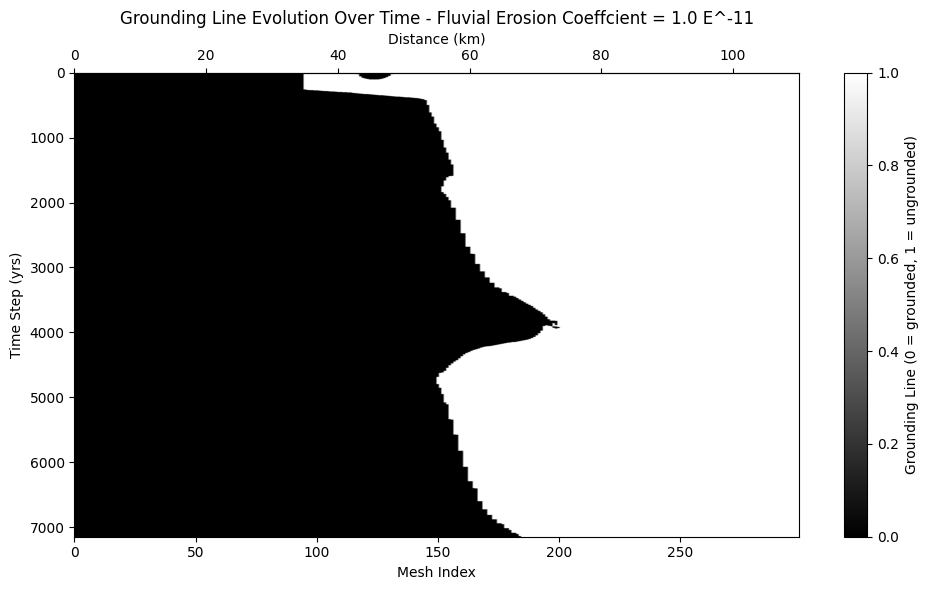

In [179]:
GL_dict = DATA_dict_cc_1e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_1e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [180]:
gl_positions_cc_1e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_1e11.append(idx)

gl_positions_cc_1e11 = np.array(gl_positions_cc_1e11)
GL_km_cc_1e11 = mesh_index_to_km(gl_positions_cc_1e11)

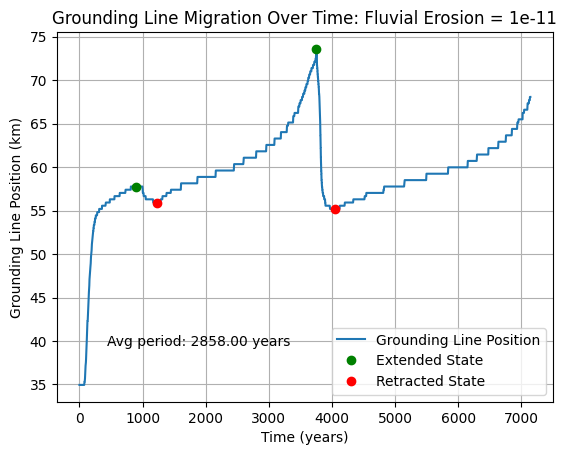

Mean cycle period: 2858.00 years
[2858.0033586]
Mean advance amplitude: 65.67 km
[57.75919732 73.57859532]
Mean retreat amplitude: 55.55 km
[55.91973244 55.18394649]


In [181]:
peaks_cc_1e11, _ = find_peaks(GL_km_cc_1e11, prominence=1) 
troughs_cc_1e11, _ = find_peaks(-GL_km_cc_1e11, prominence=1)     
periods_cc_1e11 = np.diff(np.array(time)[peaks_cc_1e11])
adv_dists_cc_1e11 = GL_km_cc_1e11[peaks_cc_1e11]
ret_dists__cc_1e11 = GL_km_cc_1e11[troughs_cc_1e11]


plt.plot(time, GL_km_cc_1e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_1e11], GL_km_cc_1e11[peaks_cc_1e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_1e11], GL_km_cc_1e11[troughs_cc_1e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_1e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 1e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_1e11):.2f} years")
print(periods_cc_1e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_1e11):.2f} km")
print(adv_dists_cc_1e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_1e11):.2f} km")
print(ret_dists__cc_1e11)


Grounding Line plotting - Fluvial Erosion = 1.5 e-11


In [182]:
gl_run_title_cc_15e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 1.5E^-11")
cc_15e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run3_1.5e-11/DATA_Dictionary_2025_04_03__23_47_32.pkl.gz"
with gzip.open(cc_15e11, 'rb') as f:
    DATA_dict_cc_15e11 = pickle.load(f)

In [183]:
bed_dict = DATA_dict_cc_15e11['bed_dict']
base_dict = DATA_dict_cc_15e11['base_dict']
surf_dict= DATA_dict_cc_15e11 ['surf_dict']
sed_dict = DATA_dict_cc_15e11['sed_dict']
H_dict = DATA_dict_cc_15e11['H_dict']
us_dict = DATA_dict_cc_15e11['us_dict']
ub_dict = DATA_dict_cc_15e11['ub_dict']
Hs_dict = DATA_dict_cc_15e11['Hs_dict']
GL_dict = DATA_dict_cc_15e11['GL_dict']
Qs_dict = DATA_dict_cc_15e11['Qs_dict']

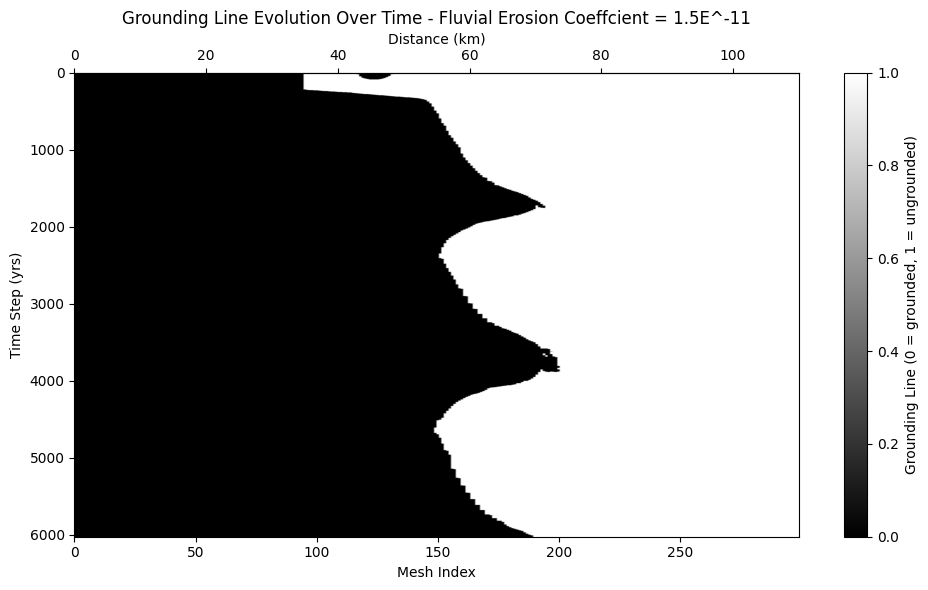

In [184]:
GL_dict = DATA_dict_cc_15e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_15e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [185]:
gl_positions_cc_15e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_15e11.append(idx)

gl_positions_cc_15e11 = np.array(gl_positions_cc_15e11)
GL_km_cc_15e11 = mesh_index_to_km(gl_positions_cc_15e11)

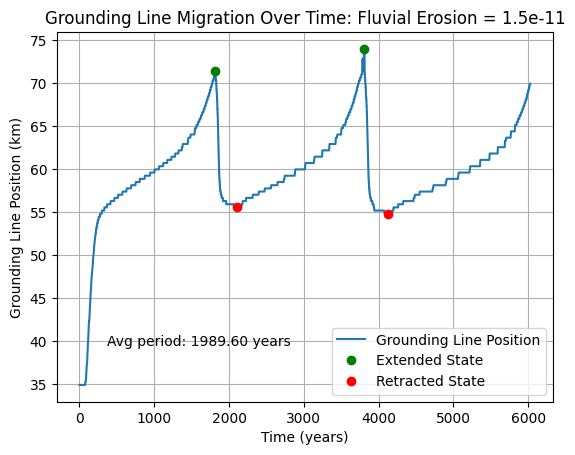

Mean cycle period: 1989.60 years
[1989.59721689]
Mean advance amplitude: 72.66 km
[71.37123746 73.94648829]
Mean retreat amplitude: 55.18 km
[55.55183946 54.81605351]


In [186]:
peaks_cc_15e11, _ = find_peaks(GL_km_cc_15e11, prominence=2) 
troughs_cc_15e11, _ = find_peaks(-GL_km_cc_15e11, prominence=2)     
periods_cc_15e11 = np.diff(np.array(time)[peaks_cc_15e11])
adv_dists_cc_15e11 = GL_km_cc_15e11[peaks_cc_15e11]
ret_dists__cc_15e11 = GL_km_cc_15e11[troughs_cc_15e11]


plt.plot(time, GL_km_cc_15e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_15e11], GL_km_cc_15e11[peaks_cc_15e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_15e11], GL_km_cc_15e11[troughs_cc_15e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_15e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 1.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_15e11):.2f} years")
print(periods_cc_15e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_15e11):.2f} km")
print(adv_dists_cc_15e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_15e11):.2f} km")
print(ret_dists__cc_15e11)


Grounding Line plotting - Fluvial Erosion = 2 e-11


In [187]:
gl_run_title_cc_2e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 2E^-11")
cc_2e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run4_2e-11/DATA_Dictionary_2025_04_04__00_26_09.pkl.gz"
with gzip.open(cc_2e11, 'rb') as f:
    DATA_dict_cc_2e11 = pickle.load(f)

In [188]:
bed_dict = DATA_dict_cc_2e11['bed_dict']
base_dict = DATA_dict_cc_2e11['base_dict']
surf_dict= DATA_dict_cc_2e11 ['surf_dict']
sed_dict = DATA_dict_cc_2e11['sed_dict']
H_dict = DATA_dict_cc_2e11['H_dict']
us_dict = DATA_dict_cc_2e11['us_dict']
ub_dict = DATA_dict_cc_2e11['ub_dict']
Hs_dict = DATA_dict_cc_2e11['Hs_dict']
GL_dict = DATA_dict_cc_2e11['GL_dict']
Qs_dict = DATA_dict_cc_2e11['Qs_dict']

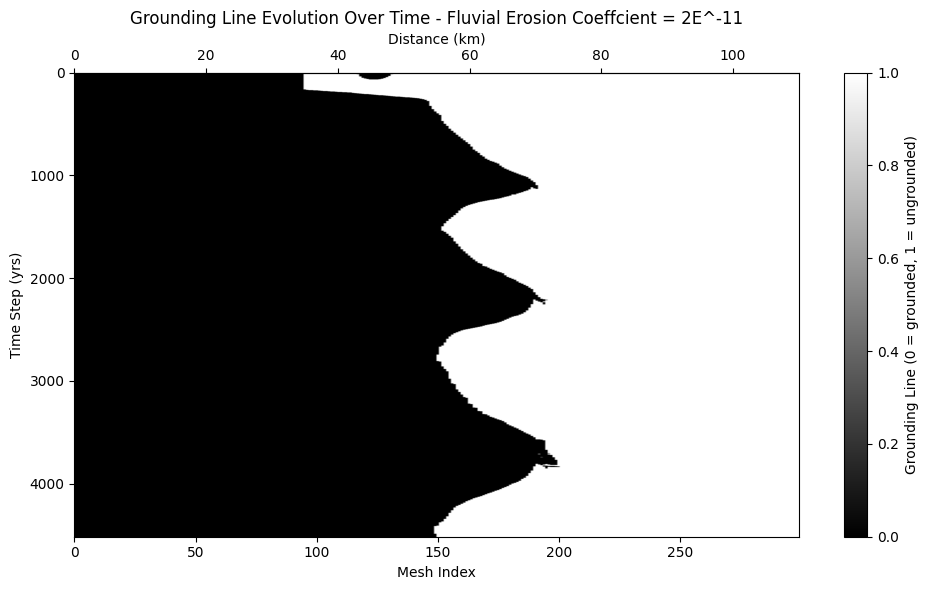

In [189]:
GL_dict = DATA_dict_cc_2e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_2e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [190]:
gl_positions_cc_2e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_2e11.append(idx)

gl_positions_cc_2e11 = np.array(gl_positions_cc_2e11)
GL_km_cc_2e11 = mesh_index_to_km(gl_positions_cc_2e11)

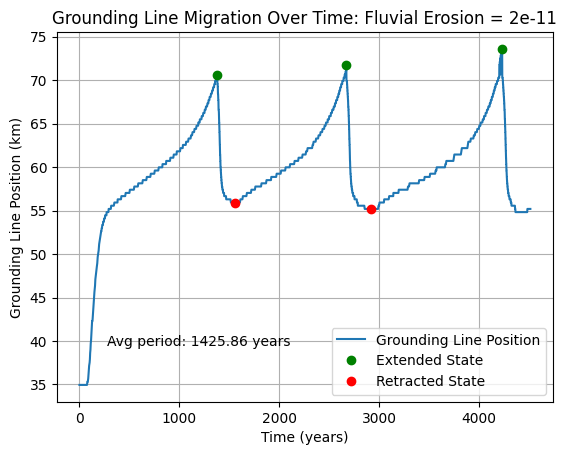

Mean cycle period: 1425.86 years
[1294.62664594 1557.09175373]
Mean advance amplitude: 71.98 km
[70.63545151 71.73913043 73.57859532]
Mean retreat amplitude: 55.55 km
[55.91973244 55.18394649]


In [191]:
peaks_cc_2e11, _ = find_peaks(GL_km_cc_2e11, prominence=2) 
troughs_cc_2e11, _ = find_peaks(-GL_km_cc_2e11, prominence=2)     
periods_cc_2e11 = np.diff(np.array(time)[peaks_cc_2e11])
adv_dists_cc_2e11 = GL_km_cc_2e11[peaks_cc_2e11]
ret_dists__cc_2e11 = GL_km_cc_2e11[troughs_cc_2e11]


plt.plot(time, GL_km_cc_2e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_2e11], GL_km_cc_2e11[peaks_cc_2e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_2e11], GL_km_cc_2e11[troughs_cc_2e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_2e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 2e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_2e11):.2f} years")
print(periods_cc_2e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_2e11):.2f} km")
print(adv_dists_cc_2e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_2e11):.2f} km")
print(ret_dists__cc_2e11)


Grounding Line plotting - Fluvial Erosion = 2.5 e-11


In [192]:
gl_run_title_cc_25e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 2.5 E^-11")
cc_25e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run5_2.5e-11/DATA_Dictionary_2025_04_04__13_54_15.pkl.gz"
with gzip.open(cc_25e11, 'rb') as f:
    DATA_dict_cc_25e11 = pickle.load(f)

In [193]:
bed_dict = DATA_dict_cc_25e11['bed_dict']
base_dict = DATA_dict_cc_25e11['base_dict']
surf_dict= DATA_dict_cc_25e11 ['surf_dict']
sed_dict = DATA_dict_cc_25e11['sed_dict']
H_dict = DATA_dict_cc_25e11['H_dict']
us_dict = DATA_dict_cc_25e11['us_dict']
ub_dict = DATA_dict_cc_25e11['ub_dict']
Hs_dict = DATA_dict_cc_25e11['Hs_dict']
GL_dict = DATA_dict_cc_25e11['GL_dict']
Qs_dict = DATA_dict_cc_25e11['Qs_dict']

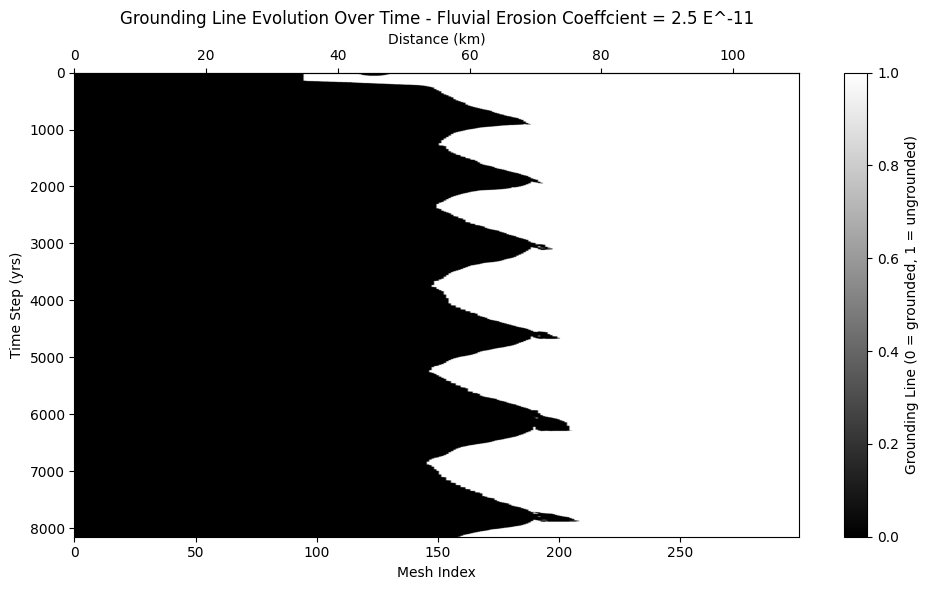

In [194]:
GL_dict = DATA_dict_cc_25e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_25e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [195]:
gl_positions_cc_25e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_25e11.append(idx)

gl_positions_cc_25e11 = np.array(gl_positions_cc_25e11)
GL_km_cc_25e11 = mesh_index_to_km(gl_positions_cc_25e11)

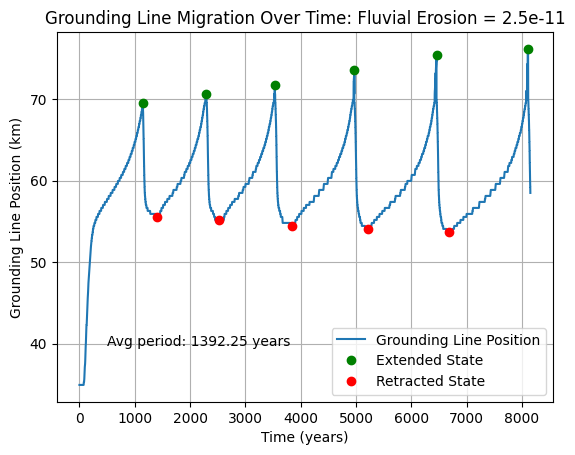

Mean cycle period: 1392.25 years
[1144.67695359 1238.43768165 1438.77505846 1486.12609258 1653.24371547]
Mean advance amplitude: 72.84 km
[69.53177258 70.63545151 71.73913043 73.57859532 75.4180602  76.15384615]
Mean retreat amplitude: 54.60 km
[55.55183946 55.18394649 54.44816054 54.08026756 53.71237458]


In [196]:
peaks_cc_25e11, _ = find_peaks(GL_km_cc_25e11, prominence=5) 
troughs_cc_25e11, _ = find_peaks(-GL_km_cc_25e11, prominence=5)     
periods_cc_25e11 = np.diff(np.array(time)[peaks_cc_25e11])
adv_dists_cc_25e11 = GL_km_cc_25e11[peaks_cc_25e11]
ret_dists__cc_25e11 = GL_km_cc_25e11[troughs_cc_25e11]


plt.plot(time, GL_km_cc_25e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_25e11], GL_km_cc_25e11[peaks_cc_25e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_25e11], GL_km_cc_25e11[troughs_cc_25e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_25e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 2.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_25e11):.2f} years")
print(periods_cc_25e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_25e11):.2f} km")
print(adv_dists_cc_25e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_25e11):.2f} km")
print(ret_dists__cc_25e11)


Grounding Line plotting - Fluvial Erosion = 3 e-11


In [197]:
gl_run_title_cc_3e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 3 E^-11")
cc_3e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run6_3e-11/DATA_Dictionary_2025_04_04__18_04_11.pkl.gz"
with gzip.open(cc_3e11, 'rb') as f:
    DATA_dict_cc_3e11 = pickle.load(f)

In [198]:
bed_dict = DATA_dict_cc_3e11['bed_dict']
base_dict = DATA_dict_cc_3e11['base_dict']
surf_dict= DATA_dict_cc_3e11 ['surf_dict']
sed_dict = DATA_dict_cc_3e11['sed_dict']
H_dict = DATA_dict_cc_3e11['H_dict']
us_dict = DATA_dict_cc_3e11['us_dict']
ub_dict = DATA_dict_cc_3e11['ub_dict']
Hs_dict = DATA_dict_cc_3e11['Hs_dict']
GL_dict = DATA_dict_cc_3e11['GL_dict']
Qs_dict = DATA_dict_cc_3e11['Qs_dict']

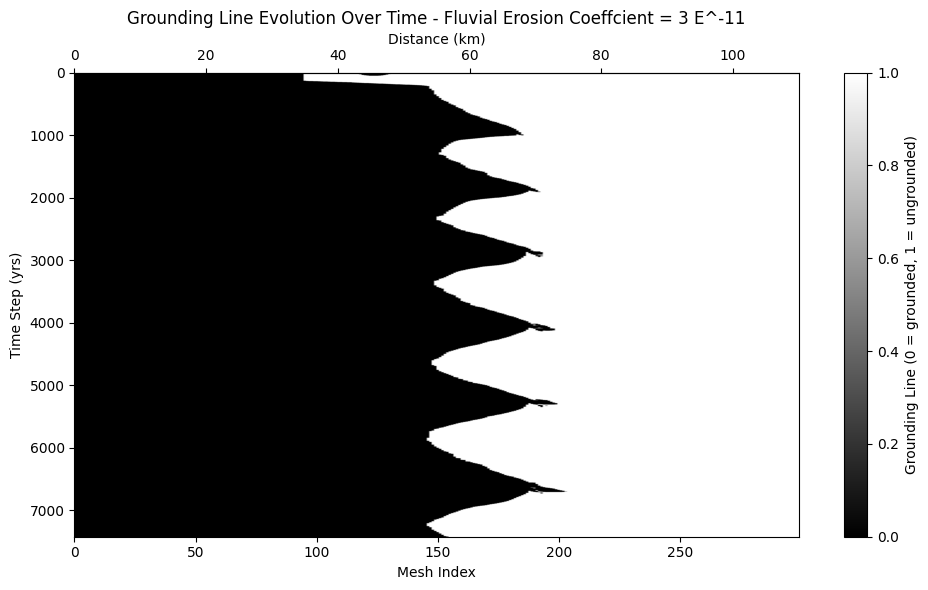

In [199]:
GL_dict = DATA_dict_cc_3e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_3e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [200]:
gl_positions_cc_3e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_3e11.append(idx)

gl_positions_cc_3e11 = np.array(gl_positions_cc_3e11)
GL_km_cc_3e11 = mesh_index_to_km(gl_positions_cc_3e11)

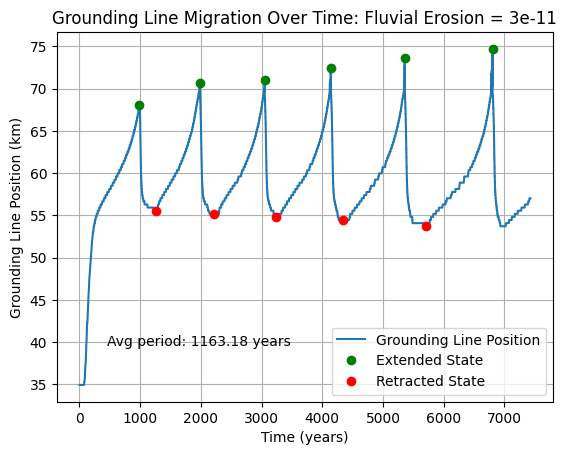

Mean cycle period: 1163.18 years
[ 994.28418941 1066.84584596 1090.64302197 1217.89691027 1446.21863898]
Mean advance amplitude: 71.74 km
[68.06020067 70.63545151 71.00334448 72.47491639 73.57859532 74.68227425]
Mean retreat amplitude: 54.74 km
[55.55183946 55.18394649 54.81605351 54.44816054 53.71237458]


In [201]:
peaks_cc_3e11, _ = find_peaks(GL_km_cc_3e11, prominence=5) 
troughs_cc_3e11, _ = find_peaks(-GL_km_cc_3e11, prominence=5)     
periods_cc_3e11 = np.diff(np.array(time)[peaks_cc_3e11])
adv_dists_cc_3e11 = GL_km_cc_3e11[peaks_cc_3e11]
ret_dists__cc_3e11 = GL_km_cc_3e11[troughs_cc_3e11]


plt.plot(time, GL_km_cc_3e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_3e11], GL_km_cc_3e11[peaks_cc_3e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_3e11], GL_km_cc_3e11[troughs_cc_3e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_3e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 3e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_3e11):.2f} years")
print(periods_cc_3e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_3e11):.2f} km")
print(adv_dists_cc_3e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_3e11):.2f} km")
print(ret_dists__cc_3e11)


Grounding Line plotting - Fluvial Erosion = 3.5 e-11


In [202]:
gl_run_title_cc_35e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 3.5 E^-11")
cc_35e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run7_3.5e-11/DATA_Dictionary_2025_04_06__13_15_10.pkl.gz"
with gzip.open(cc_35e11, 'rb') as f:
    DATA_dict_cc_35e11 = pickle.load(f)

In [203]:
bed_dict = DATA_dict_cc_35e11['bed_dict']
base_dict = DATA_dict_cc_35e11['base_dict']
surf_dict= DATA_dict_cc_35e11 ['surf_dict']
sed_dict = DATA_dict_cc_35e11['sed_dict']
H_dict = DATA_dict_cc_35e11['H_dict']
us_dict = DATA_dict_cc_35e11['us_dict']
ub_dict = DATA_dict_cc_35e11['ub_dict']
Hs_dict = DATA_dict_cc_35e11['Hs_dict']
GL_dict = DATA_dict_cc_35e11['GL_dict']
Qs_dict = DATA_dict_cc_35e11['Qs_dict']

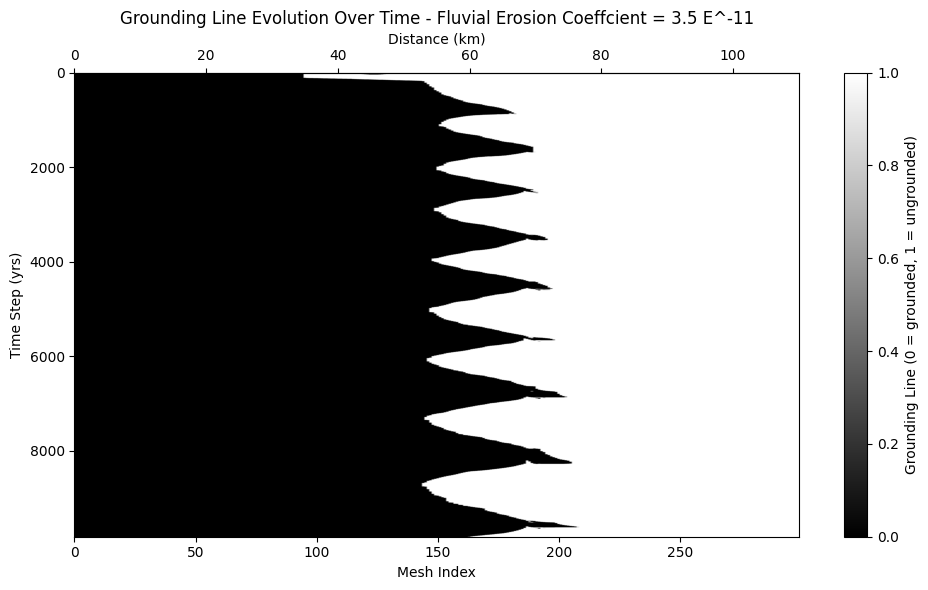

In [204]:
GL_dict = DATA_dict_cc_35e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_35e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [205]:
gl_positions_cc_35e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_35e11.append(idx)

gl_positions_cc_35e11 = np.array(gl_positions_cc_35e11)
GL_km_cc_35e11 = mesh_index_to_km(gl_positions_cc_35e11)

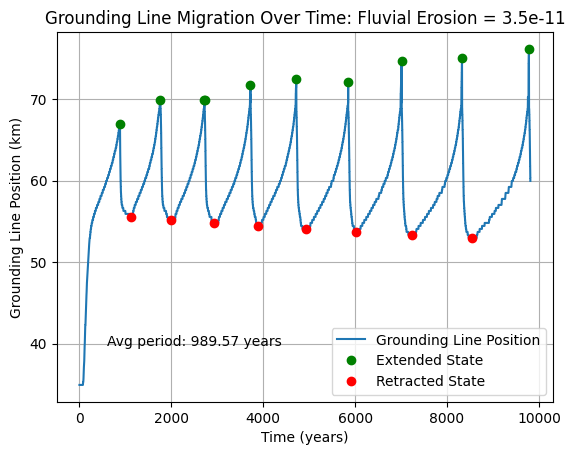

Mean cycle period: 989.57 years
[ 877.39795231  963.74695509    5.70575602  999.66556765  996.61051206
 1129.40346149 1161.99898497 1315.21094714 1456.41735899]
Mean advance amplitude: 71.89 km
[66.95652174 69.89966555 69.89966555 69.89966555 71.73913043 72.47491639
 72.10702341 74.68227425 75.05016722 76.15384615]
Mean retreat amplitude: 54.26 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863]


In [206]:
peaks_cc_35e11, _ = find_peaks(GL_km_cc_35e11, prominence=5) 
troughs_cc_35e11, _ = find_peaks(-GL_km_cc_35e11, prominence=5)     
periods_cc_35e11 = np.diff(np.array(time)[peaks_cc_35e11])
adv_dists_cc_35e11 = GL_km_cc_35e11[peaks_cc_35e11]
ret_dists__cc_35e11 = GL_km_cc_35e11[troughs_cc_35e11]


plt.plot(time, GL_km_cc_35e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_35e11], GL_km_cc_35e11[peaks_cc_35e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_35e11], GL_km_cc_35e11[troughs_cc_35e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_35e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 3.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_35e11):.2f} years")
print(periods_cc_35e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_35e11):.2f} km")
print(adv_dists_cc_35e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_35e11):.2f} km")
print(ret_dists__cc_35e11)


Grounding Line plotting - Fluvial Erosion = 4 e-11


In [207]:
gl_run_title_cc_4e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 4 E^-11")
cc_4e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run8_4e-11/DATA_Dictionary_2025_04_06__15_14_36.pkl.gz"
with gzip.open(cc_4e11, 'rb') as f:
    DATA_dict_cc_4e11 = pickle.load(f)

In [208]:
bed_dict = DATA_dict_cc_4e11['bed_dict']
base_dict = DATA_dict_cc_4e11['base_dict']
surf_dict= DATA_dict_cc_4e11 ['surf_dict']
sed_dict = DATA_dict_cc_4e11['sed_dict']
H_dict = DATA_dict_cc_4e11['H_dict']
us_dict = DATA_dict_cc_4e11['us_dict']
ub_dict = DATA_dict_cc_4e11['ub_dict']
Hs_dict = DATA_dict_cc_4e11['Hs_dict']
GL_dict = DATA_dict_cc_4e11['GL_dict']
Qs_dict = DATA_dict_cc_4e11['Qs_dict']

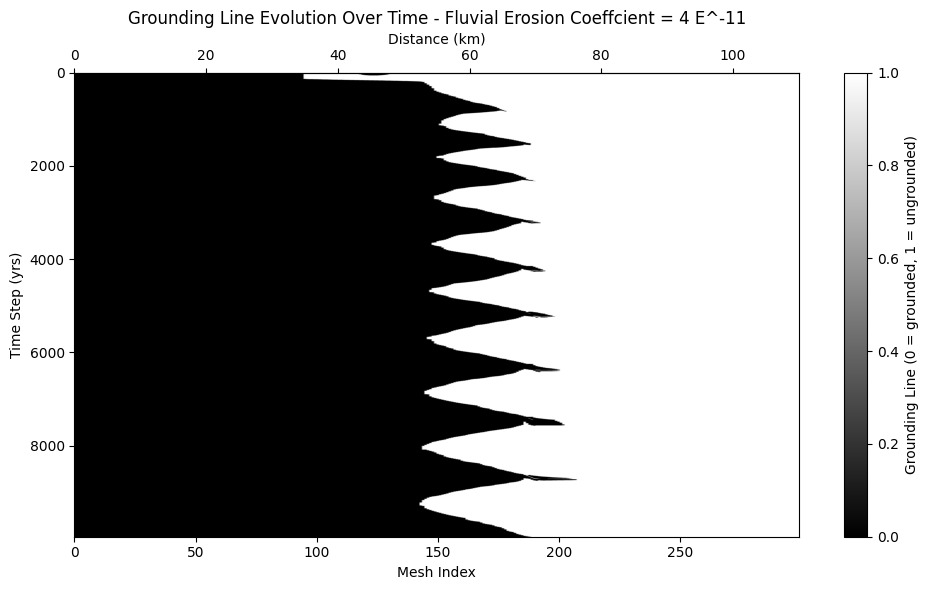

In [209]:
GL_dict = DATA_dict_cc_4e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_4e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [210]:
gl_positions_cc_4e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_4e11.append(idx)

gl_positions_cc_4e11 = np.array(gl_positions_cc_4e11)
GL_km_cc_4e11 = mesh_index_to_km(gl_positions_cc_4e11)

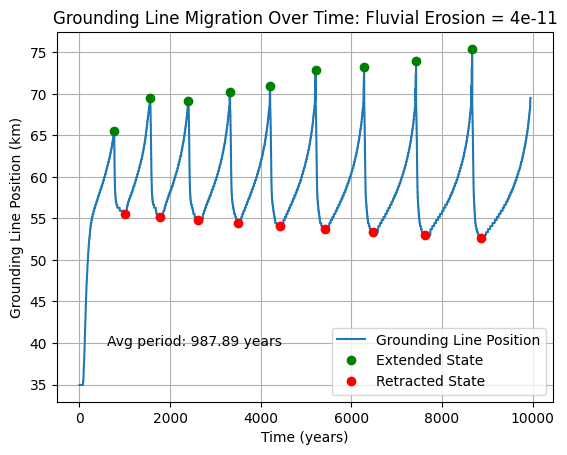

Mean cycle period: 987.89 years
[ 794.11616422  846.08909087  918.84961493  885.08323306 1003.55326349
 1071.67820725 1147.17089745 1236.56763466]
Mean advance amplitude: 71.21 km
[65.48494983 69.53177258 69.1638796  70.26755853 71.00334448 72.84280936
 73.21070234 73.94648829 75.4180602 ]
Mean retreat amplitude: 54.08 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 52.97658863 52.60869565]


In [211]:
peaks_cc_4e11, _ = find_peaks(GL_km_cc_4e11, prominence=5) 
troughs_cc_4e11, _ = find_peaks(-GL_km_cc_4e11, prominence=5)     
periods_cc_4e11 = np.diff(np.array(time)[peaks_cc_4e11])
adv_dists_cc_4e11 = GL_km_cc_4e11[peaks_cc_4e11]
ret_dists__cc_4e11 = GL_km_cc_4e11[troughs_cc_4e11]


plt.plot(time, GL_km_cc_4e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_4e11], GL_km_cc_4e11[peaks_cc_4e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_4e11], GL_km_cc_4e11[troughs_cc_4e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_4e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 4e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_4e11):.2f} years")
print(periods_cc_4e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_4e11):.2f} km")
print(adv_dists_cc_4e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_4e11):.2f} km")
print(ret_dists__cc_4e11)


Grounding Line plotting - Fluvial Erosion = 4.5 e-11


In [212]:
gl_run_title_cc_45e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 4.5E^-11")
cc_45e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run9_4.5e-11/DATA_Dictionary_2025_04_06__19_23_25.pkl.gz"
with gzip.open(cc_45e11, 'rb') as f:
    DATA_dict_cc_45e11 = pickle.load(f)

In [213]:
bed_dict = DATA_dict_cc_45e11['bed_dict']
base_dict = DATA_dict_cc_45e11['base_dict']
surf_dict= DATA_dict_cc_45e11 ['surf_dict']
sed_dict = DATA_dict_cc_45e11['sed_dict']
H_dict = DATA_dict_cc_45e11['H_dict']
us_dict = DATA_dict_cc_45e11['us_dict']
ub_dict = DATA_dict_cc_45e11['ub_dict']
Hs_dict = DATA_dict_cc_45e11['Hs_dict']
GL_dict = DATA_dict_cc_45e11['GL_dict']
Qs_dict = DATA_dict_cc_45e11['Qs_dict']

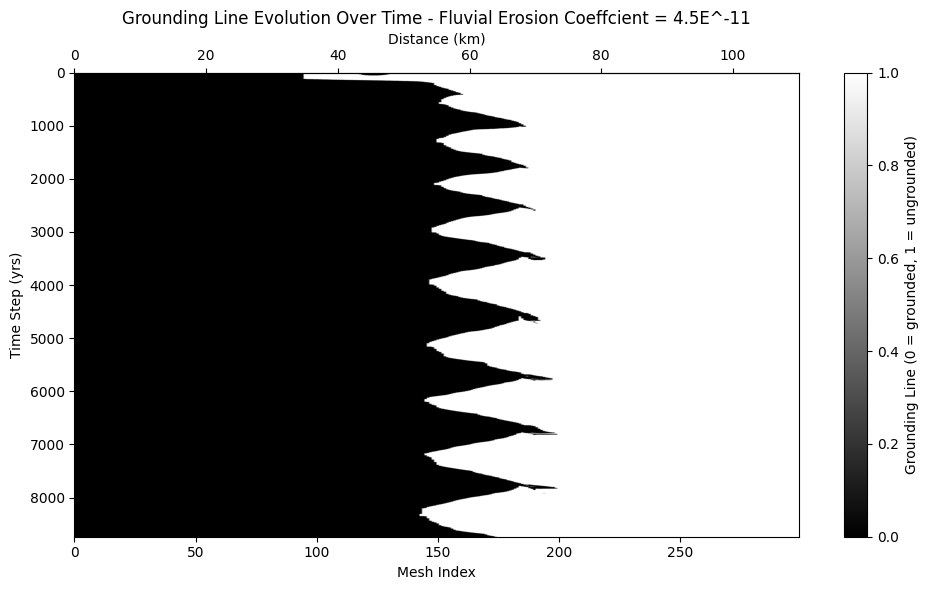

In [214]:
GL_dict = DATA_dict_cc_45e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_45e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [215]:
gl_positions_cc_45e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_45e11.append(idx)

gl_positions_cc_45e11 = np.array(gl_positions_cc_45e11)
GL_km_cc_45e11 = mesh_index_to_km(gl_positions_cc_45e11)

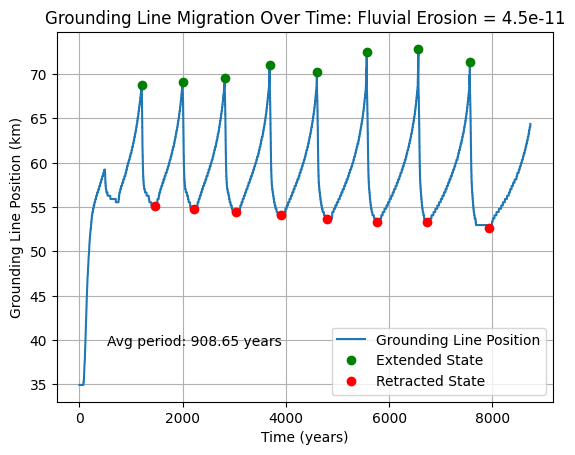

Mean cycle period: 908.65 years
[ 794.22446085  814.81559762  872.5694705   915.64142415  965.46376276
 1000.91605123  996.90851274]
Mean advance amplitude: 70.68 km
[68.79598662 69.1638796  69.53177258 71.00334448 70.26755853 72.47491639
 72.84280936 71.37123746]
Mean retreat amplitude: 53.94 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.60869565]


In [216]:
peaks_cc_45e11, _ = find_peaks(GL_km_cc_45e11, prominence=5) 
troughs_cc_45e11, _ = find_peaks(-GL_km_cc_45e11, prominence=5)     
periods_cc_45e11 = np.diff(np.array(time)[peaks_cc_45e11])
adv_dists_cc_45e11 = GL_km_cc_45e11[peaks_cc_45e11]
ret_dists__cc_45e11 = GL_km_cc_45e11[troughs_cc_45e11]


plt.plot(time, GL_km_cc_45e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_45e11], GL_km_cc_45e11[peaks_cc_45e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_45e11], GL_km_cc_45e11[troughs_cc_45e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_45e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 4.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_45e11):.2f} years")
print(periods_cc_45e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_45e11):.2f} km")
print(adv_dists_cc_45e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_45e11):.2f} km")
print(ret_dists__cc_45e11)


Grounding Line plotting - Fluvial Erosion = 5 e-11


In [217]:
gl_run_title_cc_5e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 5.0 E^-11")
cc_5e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run10_5e-11/DATA_Dictionary_2025_04_06__21_18_07.pkl.gz"
with gzip.open(cc_5e11, 'rb') as f:
    DATA_dict_cc_5e11 = pickle.load(f)

In [218]:
bed_dict = DATA_dict_cc_5e11['bed_dict']
base_dict = DATA_dict_cc_5e11['base_dict']
surf_dict= DATA_dict_cc_5e11 ['surf_dict']
sed_dict = DATA_dict_cc_5e11['sed_dict']
H_dict = DATA_dict_cc_5e11['H_dict']
us_dict = DATA_dict_cc_5e11['us_dict']
ub_dict = DATA_dict_cc_5e11['ub_dict']
Hs_dict = DATA_dict_cc_5e11['Hs_dict']
GL_dict = DATA_dict_cc_5e11['GL_dict']
Qs_dict = DATA_dict_cc_5e11['Qs_dict']

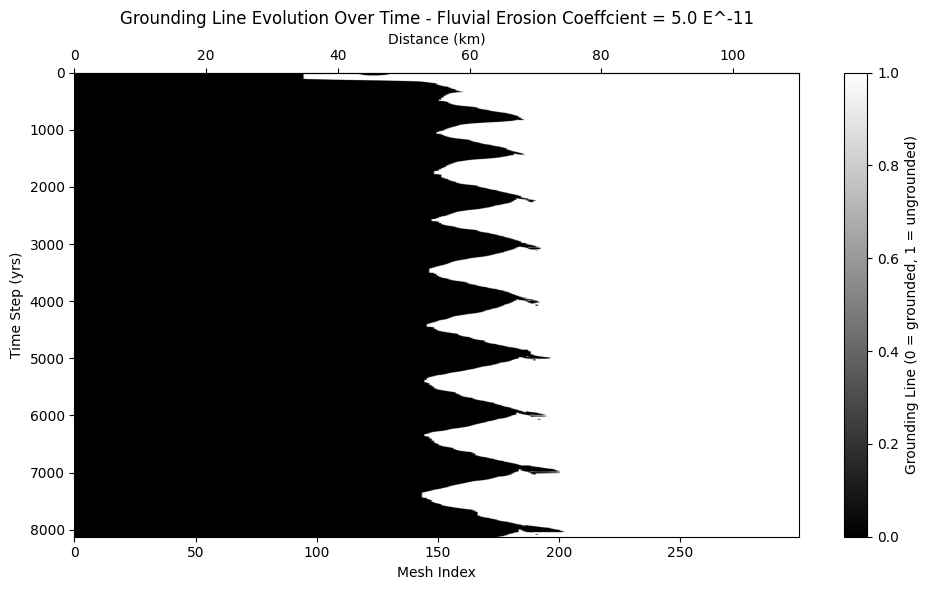

In [219]:
GL_dict = DATA_dict_cc_5e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_5e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [220]:
gl_positions_cc_5e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_5e11.append(idx)

gl_positions_cc_5e11 = np.array(gl_positions_cc_5e11)
GL_km_cc_5e11 = mesh_index_to_km(gl_positions_cc_5e11)

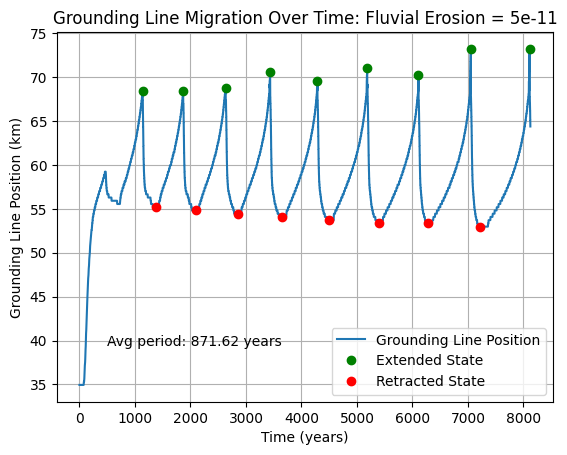

Mean cycle period: 871.62 years
[ 731.17664818  765.35723967  801.83053734  850.85569445  897.86178343
  923.5788195   943.37435896 1058.89407233]
Mean advance amplitude: 70.39 km
[68.42809365 68.42809365 68.79598662 70.63545151 69.53177258 71.00334448
 70.26755853 73.21070234 73.21070234]
Mean retreat amplitude: 53.99 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.97658863]


In [221]:
peaks_cc_5e11, _ = find_peaks(GL_km_cc_5e11, prominence=5) 
troughs_cc_5e11, _ = find_peaks(-GL_km_cc_5e11, prominence=5)     
periods_cc_5e11 = np.diff(np.array(time)[peaks_cc_5e11])
adv_dists_cc_5e11 = GL_km_cc_5e11[peaks_cc_5e11]
ret_dists__cc_5e11 = GL_km_cc_5e11[troughs_cc_5e11]


plt.plot(time, GL_km_cc_5e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_5e11], GL_km_cc_5e11[peaks_cc_5e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_5e11], GL_km_cc_5e11[troughs_cc_5e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_5e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_5e11):.2f} years")
print(periods_cc_5e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_5e11):.2f} km")
print(adv_dists_cc_5e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_5e11):.2f} km")
print(ret_dists__cc_5e11)


Grounding Line plotting - Fluvial Erosion = 5.5 e-11


In [222]:
gl_run_title_cc_55e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 5.5 E^-11")
cc_55e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run11_5.5e-11/DATA_Dictionary_2025_04_06__23_38_52.pkl.gz"
with gzip.open(cc_55e11, 'rb') as f:
    DATA_dict_cc_55e11 = pickle.load(f)

In [223]:
bed_dict = DATA_dict_cc_55e11['bed_dict']
base_dict = DATA_dict_cc_55e11['base_dict']
surf_dict= DATA_dict_cc_55e11 ['surf_dict']
sed_dict = DATA_dict_cc_55e11['sed_dict']
H_dict = DATA_dict_cc_55e11['H_dict']
us_dict = DATA_dict_cc_55e11['us_dict']
ub_dict = DATA_dict_cc_55e11['ub_dict']
Hs_dict = DATA_dict_cc_55e11['Hs_dict']
GL_dict = DATA_dict_cc_55e11['GL_dict']
Qs_dict = DATA_dict_cc_55e11['Qs_dict']

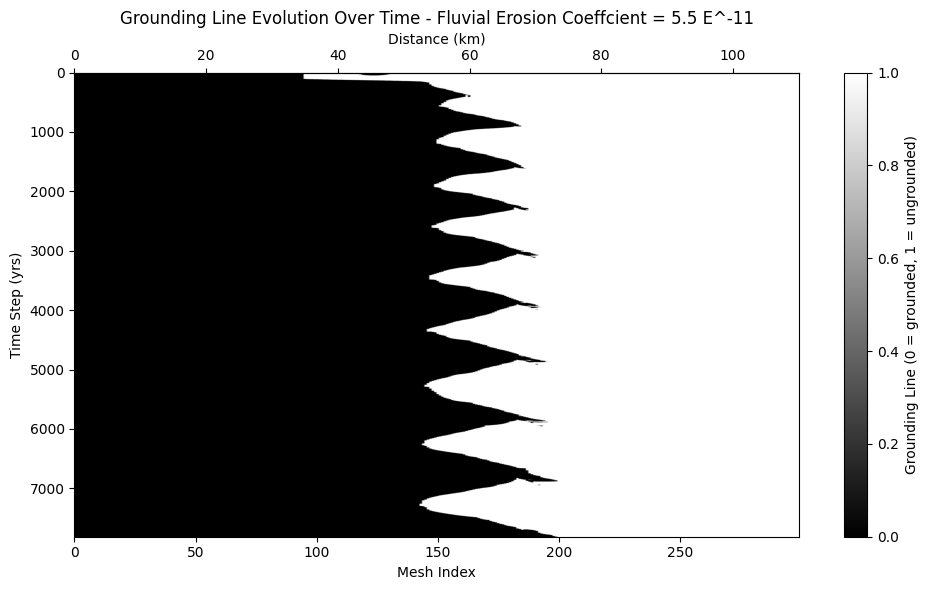

In [224]:
GL_dict = DATA_dict_cc_55e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_55e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [225]:
gl_positions_cc_55e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_55e11.append(idx)

gl_positions_cc_55e11 = np.array(gl_positions_cc_55e11)
GL_km_cc_55e11 = mesh_index_to_km(gl_positions_cc_55e11)

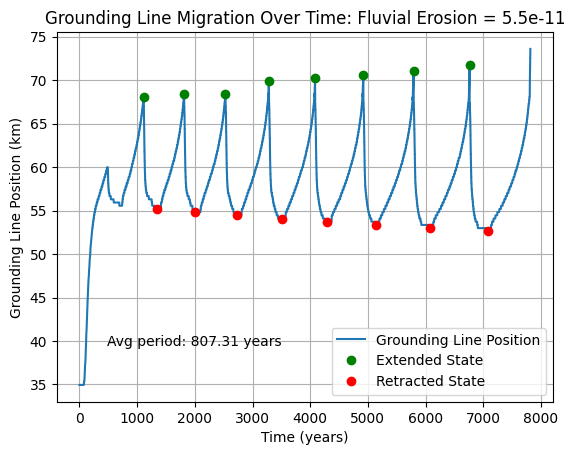

Mean cycle period: 807.31 years
[702.2240245  716.97496532 752.88259711 800.60185963 835.46849313
 871.75208338 971.23918691]
Mean advance amplitude: 69.81 km
[68.06020067 68.42809365 68.42809365 69.89966555 70.26755853 70.63545151
 71.00334448 71.73913043]
Mean retreat amplitude: 53.90 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 52.97658863 52.60869565]


In [226]:
peaks_cc_55e11, _ = find_peaks(GL_km_cc_55e11, prominence=5) 
troughs_cc_55e11, _ = find_peaks(-GL_km_cc_55e11, prominence=5)     
periods_cc_55e11 = np.diff(np.array(time)[peaks_cc_55e11])
adv_dists_cc_55e11 = GL_km_cc_55e11[peaks_cc_55e11]
ret_dists__cc_55e11 = GL_km_cc_55e11[troughs_cc_55e11]


plt.plot(time, GL_km_cc_55e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_55e11], GL_km_cc_55e11[peaks_cc_55e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_55e11], GL_km_cc_55e11[troughs_cc_55e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_55e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 5.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_55e11):.2f} years")
print(periods_cc_55e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_55e11):.2f} km")
print(adv_dists_cc_55e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_55e11):.2f} km")
print(ret_dists__cc_55e11)


Grounding Line plotting - Fluvial Erosion = 6 e-11


In [227]:
gl_run_title_cc_6e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 6.0 E^-11")
cc_6e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run12_6e-11/DATA_Dictionary_2025_04_07__11_41_22.pkl.gz"
with gzip.open(cc_6e11, 'rb') as f:
    DATA_dict_cc_6e11 = pickle.load(f)

In [228]:
bed_dict = DATA_dict_cc_6e11['bed_dict']
base_dict = DATA_dict_cc_6e11['base_dict']
surf_dict= DATA_dict_cc_6e11 ['surf_dict']
sed_dict = DATA_dict_cc_6e11['sed_dict']
H_dict = DATA_dict_cc_6e11['H_dict']
us_dict = DATA_dict_cc_6e11['us_dict']
ub_dict = DATA_dict_cc_6e11['ub_dict']
Hs_dict = DATA_dict_cc_6e11['Hs_dict']
GL_dict = DATA_dict_cc_6e11['GL_dict']
Qs_dict = DATA_dict_cc_6e11['Qs_dict']

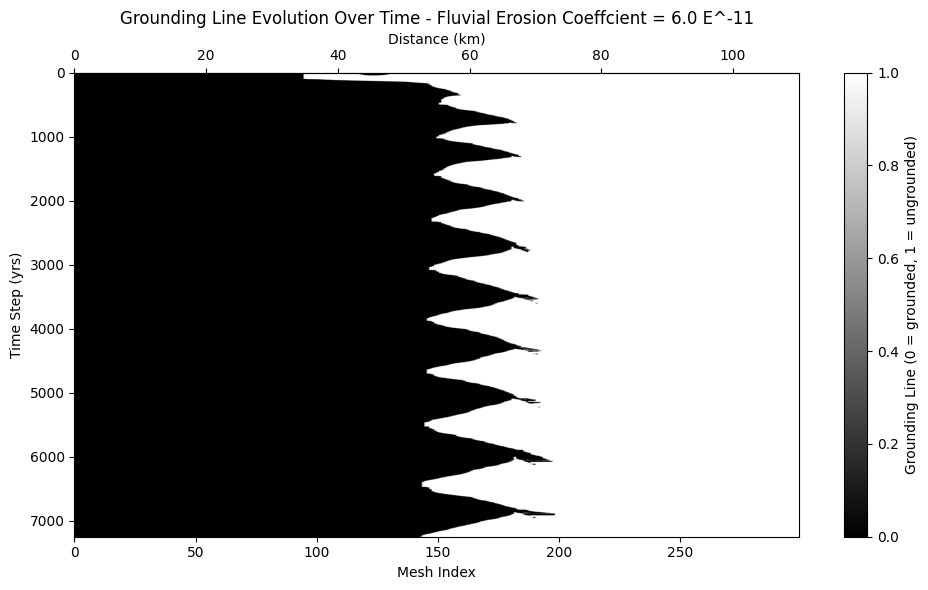

In [229]:
GL_dict = DATA_dict_cc_6e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_6e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [230]:
gl_positions_cc_6e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_6e11.append(idx)

gl_positions_cc_6e11 = np.array(gl_positions_cc_6e11)
GL_km_cc_6e11 = mesh_index_to_km(gl_positions_cc_6e11)

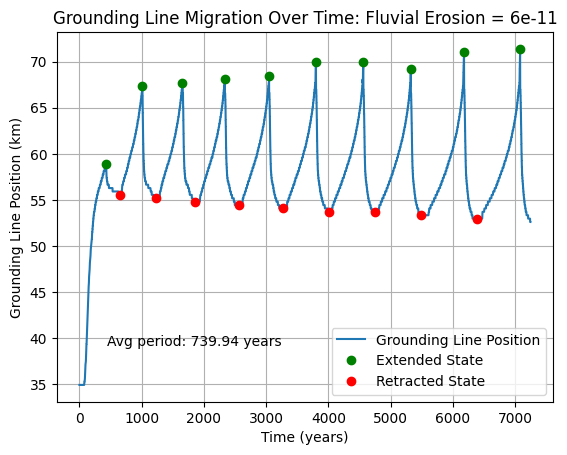

Mean cycle period: 739.94 years
[588.96278199 644.01045347 680.79912679 711.13462298 752.97405335
 761.07295021 763.39898384 855.3600633  901.75045875]
Mean advance amplitude: 68.17 km
[58.86287625 67.32441472 67.69230769 68.06020067 68.42809365 69.89966555
 69.89966555 69.1638796  71.00334448 71.37123746]
Mean retreat amplitude: 54.20 km
[55.55183946 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.71237458 53.34448161 52.97658863]


In [231]:
peaks_cc_6e11, _ = find_peaks(GL_km_cc_6e11, prominence=3) 
troughs_cc_6e11, _ = find_peaks(-GL_km_cc_6e11, prominence=3)     
periods_cc_6e11 = np.diff(np.array(time)[peaks_cc_6e11])
adv_dists_cc_6e11 = GL_km_cc_6e11[peaks_cc_6e11]
ret_dists__cc_6e11 = GL_km_cc_6e11[troughs_cc_6e11]


plt.plot(time, GL_km_cc_6e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_6e11], GL_km_cc_6e11[peaks_cc_6e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_6e11], GL_km_cc_6e11[troughs_cc_6e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_6e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 6e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_6e11):.2f} years")
print(periods_cc_6e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_6e11):.2f} km")
print(adv_dists_cc_6e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_6e11):.2f} km")
print(ret_dists__cc_6e11)


Grounding Line plotting - Fluvial Erosion = 6.5 e-11


In [232]:
gl_run_title_cc_65e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 6.5 E^-11")
cc_65e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run13_6.5e-11/DATA_Dictionary_2025_04_07__21_03_25.pkl.gz"
with gzip.open(cc_65e11, 'rb') as f:
    DATA_dict_cc_65e11 = pickle.load(f)

In [233]:
bed_dict = DATA_dict_cc_65e11['bed_dict']
base_dict = DATA_dict_cc_65e11['base_dict']
surf_dict= DATA_dict_cc_65e11 ['surf_dict']
sed_dict = DATA_dict_cc_65e11['sed_dict']
H_dict = DATA_dict_cc_65e11['H_dict']
us_dict = DATA_dict_cc_65e11['us_dict']
ub_dict = DATA_dict_cc_65e11['ub_dict']
Hs_dict = DATA_dict_cc_65e11['Hs_dict']
GL_dict = DATA_dict_cc_65e11['GL_dict']
Qs_dict = DATA_dict_cc_65e11['Qs_dict']

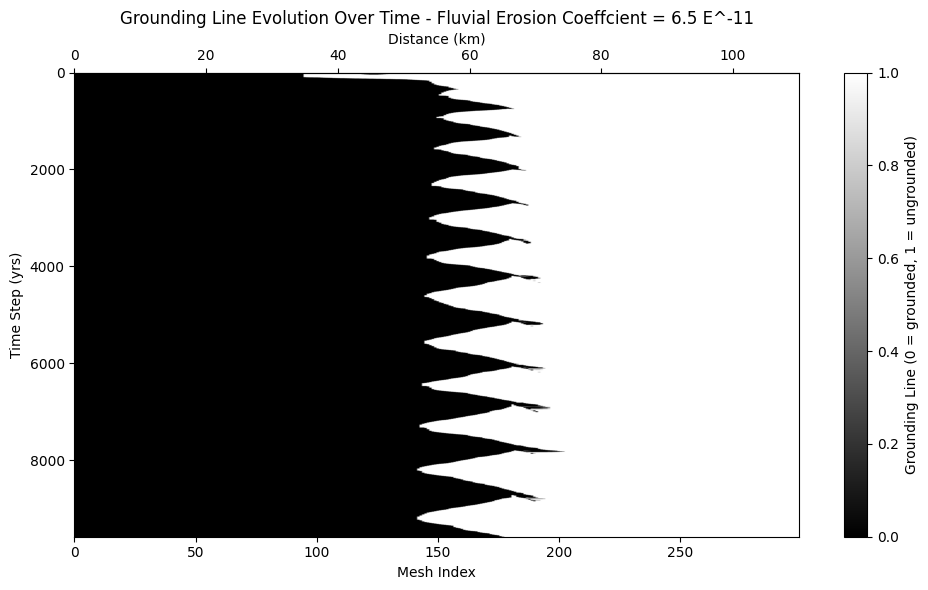

In [234]:
GL_dict = DATA_dict_cc_65e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_65e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [235]:
gl_positions_cc_65e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_65e11.append(idx)

gl_positions_cc_65e11 = np.array(gl_positions_cc_65e11)
GL_km_cc_65e11 = mesh_index_to_km(gl_positions_cc_65e11)

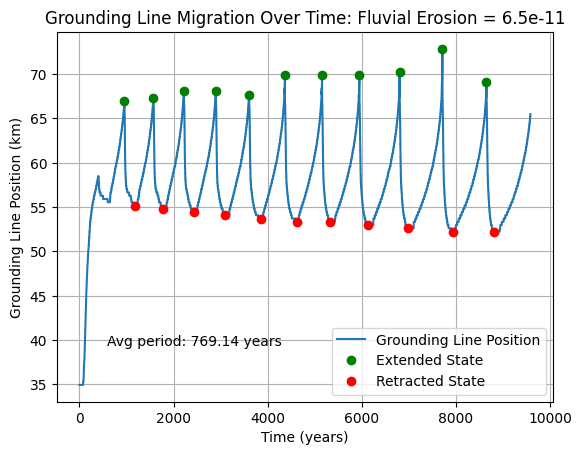

Mean cycle period: 769.14 years
[614.25746154 648.5431397  678.48964639 707.6568858  759.65368074
 789.09116603 793.14465818 854.26404952 909.90332135 936.43920407]
Mean advance amplitude: 69.10 km
[66.95652174 67.32441472 68.06020067 68.06020067 67.69230769 69.89966555
 69.89966555 69.89966555 70.26755853 72.84280936 69.1638796 ]
Mean retreat amplitude: 53.55 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.97658863 52.60869565 52.24080268 52.24080268]


In [236]:
peaks_cc_65e11, _ = find_peaks(GL_km_cc_65e11, prominence=5) 
troughs_cc_65e11, _ = find_peaks(-GL_km_cc_65e11, prominence=5)     
periods_cc_65e11 = np.diff(np.array(time)[peaks_cc_65e11])
adv_dists_cc_65e11 = GL_km_cc_65e11[peaks_cc_65e11]
ret_dists__cc_65e11 = GL_km_cc_65e11[troughs_cc_65e11]


plt.plot(time, GL_km_cc_65e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_65e11], GL_km_cc_65e11[peaks_cc_65e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_65e11], GL_km_cc_65e11[troughs_cc_65e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_65e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 6.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_65e11):.2f} years")
print(periods_cc_65e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_65e11):.2f} km")
print(adv_dists_cc_65e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_65e11):.2f} km")
print(ret_dists__cc_65e11)


Grounding Line plotting - Fluvial Erosion = 7 e-11


In [237]:
gl_run_title_cc_7e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 7.0 E^-11")
cc_7e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run14_7e-11/DATA_Dictionary_2025_04_08__20_38_56.pkl.gz"
with gzip.open(cc_7e11, 'rb') as f:
    DATA_dict_cc_7e11 = pickle.load(f)

In [238]:
bed_dict = DATA_dict_cc_7e11['bed_dict']
base_dict = DATA_dict_cc_7e11['base_dict']
surf_dict= DATA_dict_cc_7e11 ['surf_dict']
sed_dict = DATA_dict_cc_7e11['sed_dict']
H_dict = DATA_dict_cc_7e11['H_dict']
us_dict = DATA_dict_cc_7e11['us_dict']
ub_dict = DATA_dict_cc_7e11['ub_dict']
Hs_dict = DATA_dict_cc_7e11['Hs_dict']
GL_dict = DATA_dict_cc_7e11['GL_dict']
Qs_dict = DATA_dict_cc_7e11['Qs_dict']

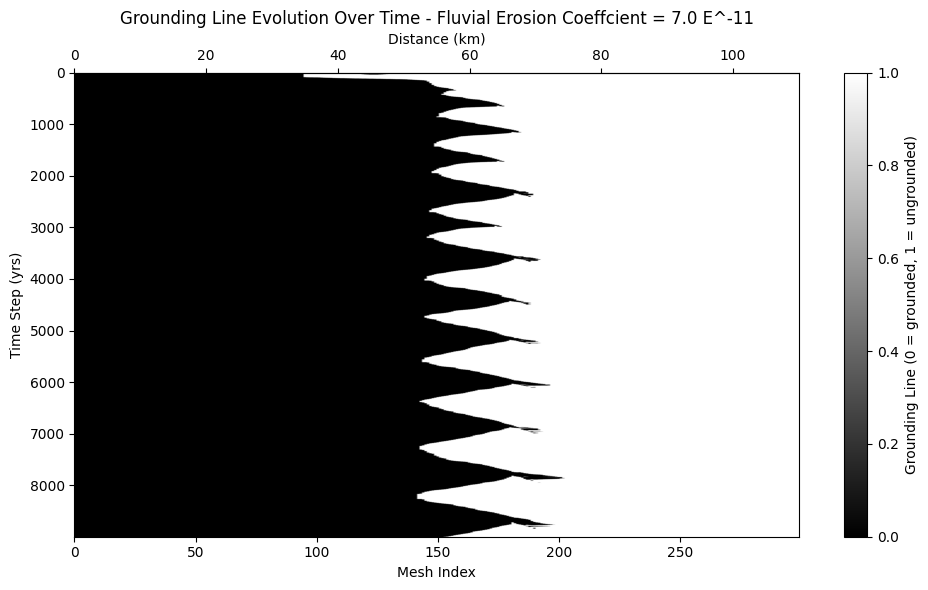

In [239]:
GL_dict = DATA_dict_cc_7e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_7e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [240]:
gl_positions_cc_7e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_7e11.append(idx)

gl_positions_cc_7e11 = np.array(gl_positions_cc_7e11)
GL_km_cc_7e11 = mesh_index_to_km(gl_positions_cc_7e11)

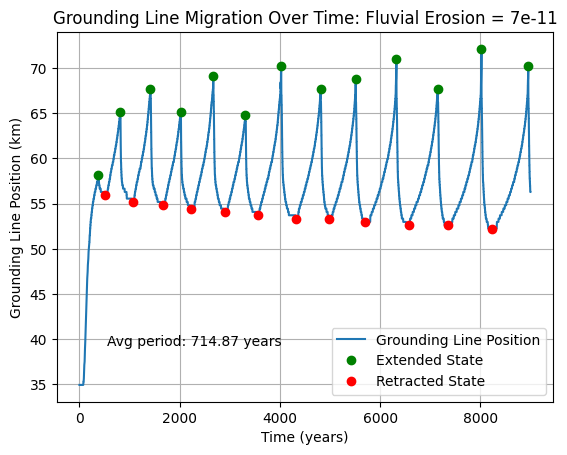

Mean cycle period: 714.87 years
[434.78118392 603.74527619 602.44042478 651.06324798 641.6710781
 714.30572682 787.82594338 700.16662871 811.50988646 824.59835673
 872.38729183 933.96926456]
Mean advance amplitude: 67.52 km
[58.1270903  65.11705686 67.69230769 65.11705686 69.1638796  64.74916388
 70.26755853 67.69230769 68.79598662 71.00334448 67.69230769 72.10702341
 70.26755853]
Mean retreat amplitude: 53.77 km
[55.91973244 55.18394649 54.81605351 54.44816054 54.08026756 53.71237458
 53.34448161 53.34448161 52.97658863 52.60869565 52.60869565 52.24080268]


In [241]:
peaks_cc_7e11, _ = find_peaks(GL_km_cc_7e11, prominence=2) 
troughs_cc_7e11, _ = find_peaks(-GL_km_cc_7e11, prominence=2)     
periods_cc_7e11 = np.diff(np.array(time)[peaks_cc_7e11])
adv_dists_cc_7e11 = GL_km_cc_7e11[peaks_cc_7e11]
ret_dists__cc_7e11 = GL_km_cc_7e11[troughs_cc_7e11]


plt.plot(time, GL_km_cc_7e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_7e11], GL_km_cc_7e11[peaks_cc_7e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_7e11], GL_km_cc_7e11[troughs_cc_7e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_7e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 7e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_7e11):.2f} years")
print(periods_cc_7e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_7e11):.2f} km")
print(adv_dists_cc_7e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_7e11):.2f} km")
print(ret_dists__cc_7e11)


Grounding Line plotting - Fluvial Erosion = 7.5 e-11


In [242]:
gl_run_title_cc_75e11 = str("Grounding Line Evolution Over Time - Fluvial Erosion Coeffcient = 7.5 E^-11")
cc_75e11 = "/media/kayatroyer/KayaDrive/Thesis/OfficialExperimentRuns/ccTests/PT2_cctests/Run15_cc7.5e-11/DATA_Dictionary_2025_04_08__23_15_48.pkl.gz"
with gzip.open(cc_75e11, 'rb') as f:
    DATA_dict_cc_75e11 = pickle.load(f)

In [243]:
bed_dict = DATA_dict_cc_75e11['bed_dict']
base_dict = DATA_dict_cc_75e11['base_dict']
surf_dict= DATA_dict_cc_75e11 ['surf_dict']
sed_dict = DATA_dict_cc_75e11['sed_dict']
H_dict = DATA_dict_cc_75e11['H_dict']
us_dict = DATA_dict_cc_75e11['us_dict']
ub_dict = DATA_dict_cc_75e11['ub_dict']
Hs_dict = DATA_dict_cc_75e11['Hs_dict']
GL_dict = DATA_dict_cc_75e11['GL_dict']
Qs_dict = DATA_dict_cc_75e11['Qs_dict']

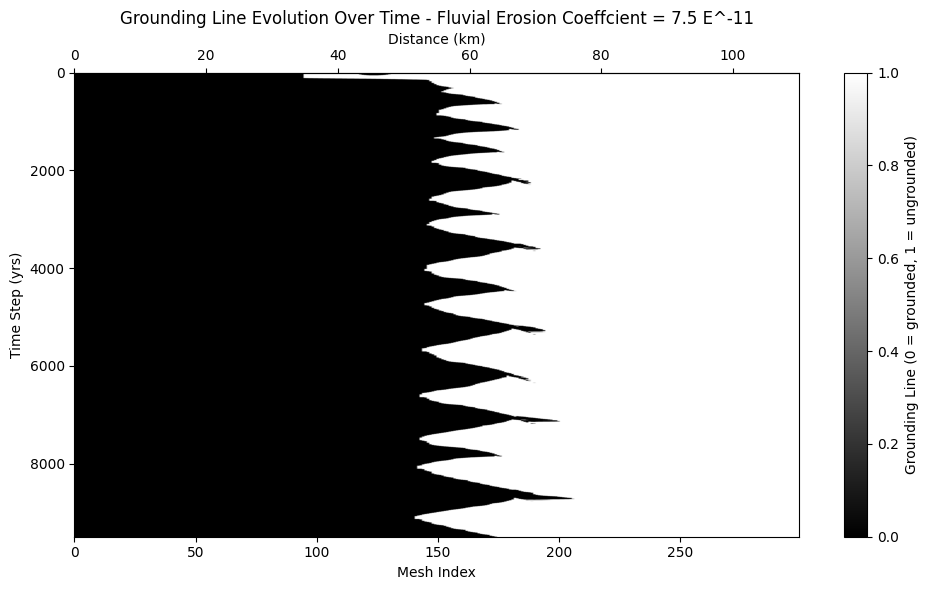

In [244]:
GL_dict = DATA_dict_cc_75e11['GL_dict']
time = list(GL_dict.keys())
mesh_indices = np.arange(300)
data_matrix = np.array([GL_dict[t] for t in time])

fig, ax = plt.subplots(figsize=(10, 6))
im = ax.imshow(
    data_matrix, aspect='auto', cmap='gray', origin='lower',
    extent=[mesh_indices[0], mesh_indices[-1], time[0], time[-1]]
)

ax.set_ylabel("Time Step (yrs)")
ax.set_xlabel("Mesh Index")
ax.invert_yaxis()
plt.colorbar(im, ax=ax, label="Grounding Line (0 = grounded, 1 = ungrounded)")
ax.set_title(gl_run_title_cc_75e11)

# Add secondary x-axis with length scale
secax = ax.secondary_xaxis('top', functions=(mesh_index_to_km, km_to_mesh_index))
secax.set_xlabel("Distance (km)")

plt.tight_layout()
plt.show()

In [245]:
gl_positions_cc_75e11 = []
for row in data_matrix:
    idx = np.argmax(row > 0.5)
    gl_positions_cc_75e11.append(idx)

gl_positions_cc_75e11 = np.array(gl_positions_cc_75e11)
GL_km_cc_75e11 = mesh_index_to_km(gl_positions_cc_75e11)

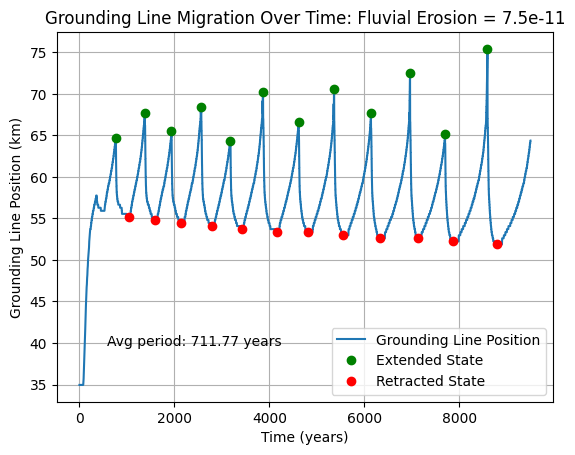

Mean cycle period: 711.77 years
[614.43965204 561.22666275 625.40593385 611.61599708 689.13761198
 748.80027878 749.57244105 775.34098295 823.17307737 737.40241276
 893.36393213]
Mean advance amplitude: 68.24 km
[64.74916388 67.69230769 65.48494983 68.42809365 64.3812709  70.26755853
 66.58862876 70.63545151 67.69230769 72.47491639 65.11705686 75.4180602 ]
Mean retreat amplitude: 53.44 km
[55.18394649 54.81605351 54.44816054 54.08026756 53.71237458 53.34448161
 53.34448161 52.97658863 52.60869565 52.60869565 52.24080268 51.8729097 ]


In [246]:
peaks_cc_75e11, _ = find_peaks(GL_km_cc_75e11, prominence=5) 
troughs_cc_75e11, _ = find_peaks(-GL_km_cc_75e11, prominence=5)     
periods_cc_75e11 = np.diff(np.array(time)[peaks_cc_75e11])
adv_dists_cc_75e11 = GL_km_cc_75e11[peaks_cc_75e11]
ret_dists__cc_75e11 = GL_km_cc_75e11[troughs_cc_75e11]


plt.plot(time, GL_km_cc_75e11, label='Grounding Line Position')
plt.plot(np.array(time)[peaks_cc_75e11], GL_km_cc_75e11[peaks_cc_75e11], 'go', label='Extended State')
plt.plot(np.array(time)[troughs_cc_75e11], GL_km_cc_75e11[troughs_cc_75e11], 'ro', label='Retracted State')
plt.text(0.1, 0.15, f'Avg period: {np.mean(periods_cc_75e11):.2f} years', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel("Time (years)")
plt.ylabel("Grounding Line Position (km)")
plt.title("Grounding Line Migration Over Time: Fluvial Erosion = 7.5e-11")
plt.grid()
plt.show()

print(f"Mean cycle period: {np.mean(periods_cc_75e11):.2f} years")
print(periods_cc_75e11)

print(f"Mean advance amplitude: {np.mean(adv_dists_cc_75e11):.2f} km")
print(adv_dists_cc_75e11)

print(f"Mean retreat amplitude: {np.mean(ret_dists__cc_75e11):.2f} km")
print(ret_dists__cc_75e11)


In [247]:
## FLUVIAL EROSION ##
title_CC_cycles = str("Number of Cycles Produced  VS Fluvial Erosion Coefficient")
CCs = np.array([5e-12,1e-11,1.5e-11,2e-11,2.5e-11,3e-11,3.5e-11,4e-11,4.5e-11,5e-11,5.5e-11,6e-11,6.5e-11,7e-11,7.5e-11])
CC_cycles = np.array([0,2,4,5,6,8,9,9,9,10,10,11,11,13,13])
CC_coeff = np.polyfit(CCs,CC_cycles, 1)
p_CC = np.poly1d(CC_coeff)
CC_y_trend = p_CC(CCs)
R_2_CC =r2_score(CC_cycles,p_CC(CCs))


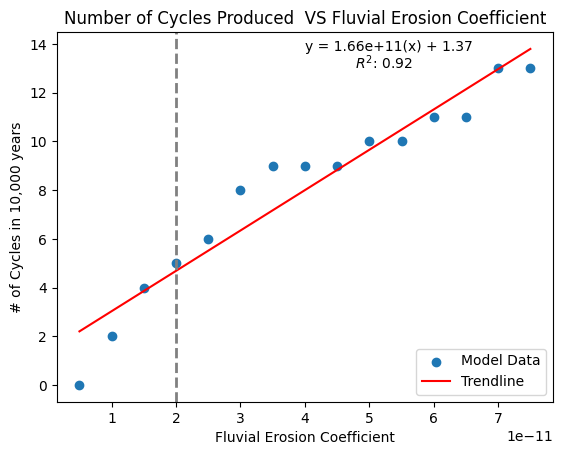

In [248]:
plt.scatter(CCs, CC_cycles, label = 'Model Data')
plt.title(title_CC_cycles)
plt.plot(CCs, CC_y_trend, color='red', label='Trendline')
plt.text(0.6, 0.9, f'$R^2$: {R_2_CC:.2f}', transform=plt.gca().transAxes)
plt.text(0.5, 0.95, f'y = {CC_coeff[0]:.2e}(x) + {CC_coeff[1]:.2f}', transform=plt.gca().transAxes)
plt.axvline(x=2e-11, color='gray', linestyle='--', linewidth=2)
plt.xlabel("Fluvial Erosion Coefficient")
plt.ylabel("# of Cycles in 10,000 years")
plt.legend()
# plt.xticks(np.arange(0, 2, 0.2)) 


### Box and Whisker Plots

Variations in Cycle Period 

In [258]:
CCs = np.array([1.5e-11,2.0e-11,2.5e-11,3.0e-11,3.5e-11,4.0e-11,4.5e-11,5.0e-11,5.5e-11,6.0e-11,6.5e-11,7.0e-11,7.5e-11])

Period_list = [periods_cc_15e11, periods_cc_2e11, periods_cc_25e11, periods_cc_3e11, periods_cc_35e11, periods_cc_4e11, periods_cc_45e11, periods_cc_5e11, periods_cc_55e11, periods_cc_6e11, periods_cc_65e11, periods_cc_7e11, periods_cc_75e11]


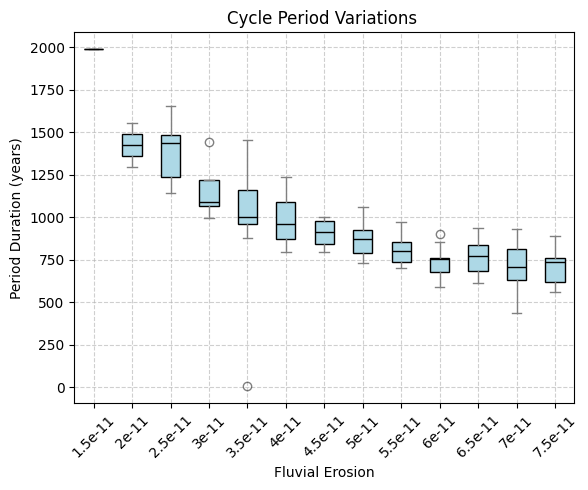

In [262]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(Period_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Cycle Period Variations ")
ax.set_ylabel("Period Duration (years)")
ax.set_xlabel("Fluvial Erosion")
# ax.set_xticks(np.arange(1, len(CCs) + 1))
ax.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(CCs)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variations in GL Extent - Advance 

In [276]:
ExtPos_list = [adv_dists_cc_15e11, adv_dists_cc_2e11, adv_dists_cc_25e11, adv_dists_cc_3e11, adv_dists_cc_35e11, adv_dists_cc_4e11, adv_dists_cc_45e11, adv_dists_cc_5e11, adv_dists_cc_55e11, adv_dists_cc_6e11, adv_dists_cc_65e11, adv_dists_cc_7e11, adv_dists_cc_75e11]


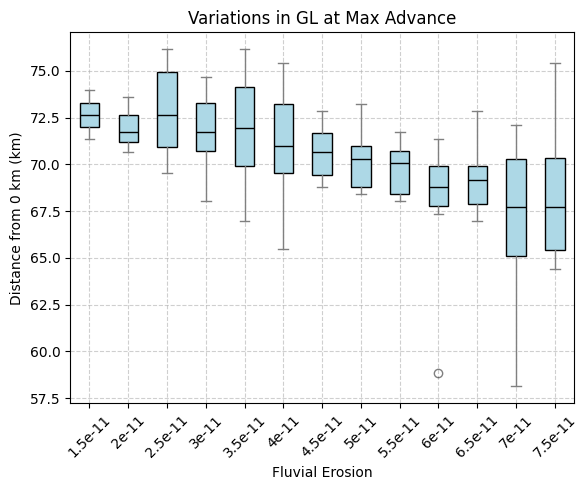

In [288]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Max Advance")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Fluvial Erosion")
ax.set_xticks(np.arange(1, len(CCs) + 1))
ax.set_xticklabels(CCs)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Variations in GL Extent - Retreat 

In [278]:
RetPos_list = [ret_dists__cc_15e11, ret_dists__cc_2e11, ret_dists__cc_25e11, ret_dists__cc_3e11, ret_dists__cc_35e11, ret_dists__cc_4e11, ret_dists__cc_45e11, ret_dists__cc_5e11, ret_dists__cc_55e11, ret_dists__cc_6e11, ret_dists__cc_65e11, ret_dists__cc_7e11, ret_dists__cc_75e11]


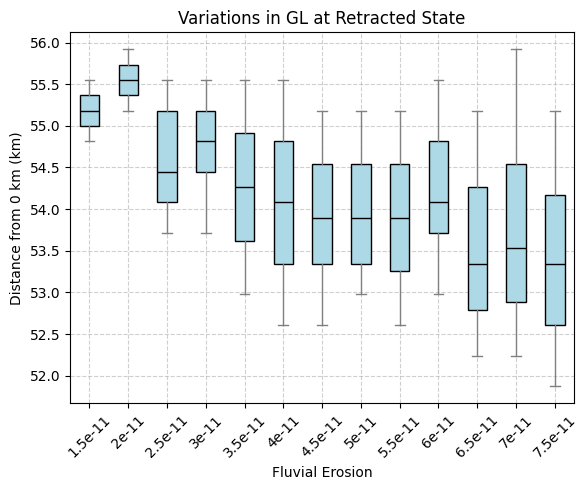

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightblue'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='gray'),
           capprops=dict(color='gray'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in GL at Retracted State")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Fluvial Erosion")
ax.set_xticks(np.arange(1, len(CCs) + 1))
ax.set_xticklabels(CCs)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

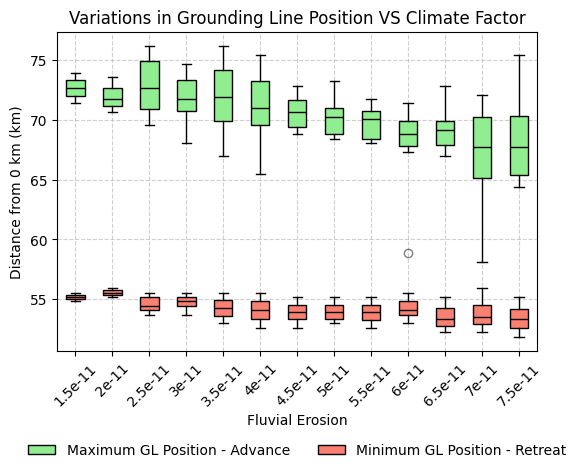

In [287]:
fig, ax = plt.subplots(figsize=(6, 5))

D2 = ax.boxplot(RetPos_list, patch_artist=True,
           boxprops=dict(facecolor='salmon'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

D1 = ax.boxplot(ExtPos_list, patch_artist=True,
           boxprops=dict(facecolor='lightgreen'),
           medianprops=dict(color='black'),
           whiskerprops=dict(color='black'),
           capprops=dict(color='black'),
           flierprops=dict(marker='o', color='red', alpha=0.5))

ax.set_title("Variations in Grounding Line Position VS Climate Factor")
ax.set_ylabel("Distance from 0 km (km)")
ax.set_xlabel("Fluvial Erosion")
ax.legend([D1["boxes"][0], D2["boxes"][0]], ['Maximum GL Position - Advance', 'Minimum GL Position - Retreat'], loc='upper center', bbox_to_anchor=(0.5, -0.25),
          ncol=2, frameon=False)
ax.set_xticks(np.arange(1, len(CCs) + 1))
ax.set_xticklabels(CCs)
ax.tick_params(axis='x', labelrotation=45)
ax.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()